# The notebook illustrates how to quickly calibrate photomultiplier tubes (PMT) on your two-photon microscope (2PM)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Load 2PM images of a slide with a uniform fluorescence, recorded at increasing laser intensities

In [2]:
images = np.load('images_calibration.npy')

## Plot histrograms of single-pixel-intensities distributions from all images

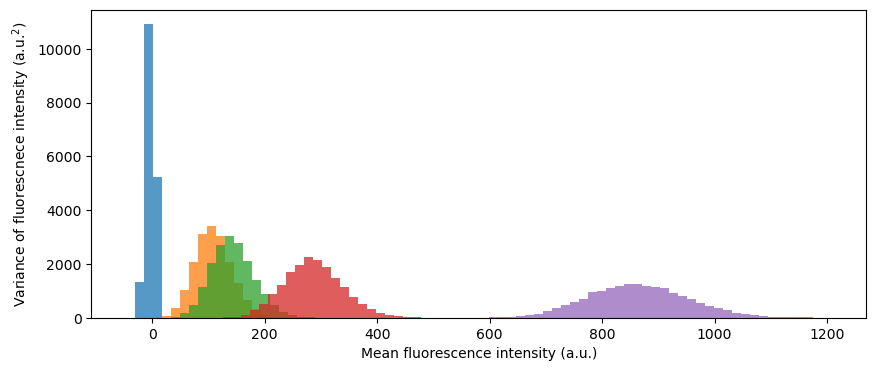

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_xlabel('Mean fluorescence intensity (a.u.)')
ax.set_ylabel('Variance of fluorescnece intensity (a.u.$^2$)')
bin_width = 16

for im in images:
    bins = np.arange(im.min(), im.max(), bin_width) - bin_width/2
    ax.hist(im.ravel(), bins=bins, alpha=0.75)

## Estimate residual dark output by taking mean value of the image recorded with the laser off (first image)

In [15]:
dark_output = images[0].mean()
print(f'Dark output = {dark_output: .2f} a.u.')

Dark output = -2.74 a.u.


## Subtract the dark output from all images, so that the mean fluorescence is zero when the laser if off (first image)

In [16]:
images_sub = images - dark_output

## Plot variance vs mean fluorescence intensity for the five images and its fit with a first-degree polynomial

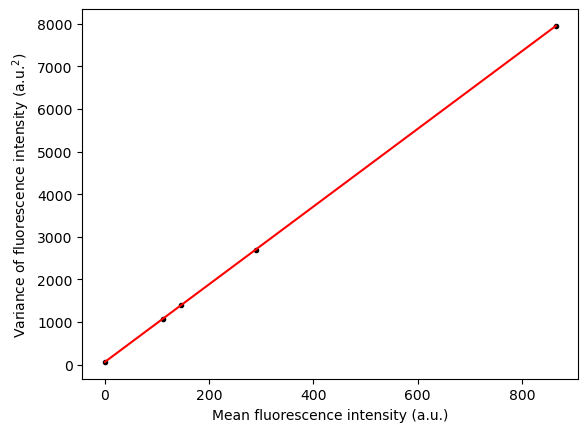

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel('Mean fluorescence intensity (a.u.)')
ax.set_ylabel('Variance of fluorescence intensity (a.u.$^2$)')

means, variances = images_sub.mean(axis=(1,2)), images_sub.var(axis=(1,2))
ax.plot(means, variances, ls='', marker='.', c='k')

(slope, intercept), cov = np.polyfit(means, variances, 1, cov=True)
ax.plot(means, np.polyval((slope, intercept), means), c='r')

## Estimate PMT gain, alpha, and STD ($\sigma$) of the dark output

In [28]:
gain = 3/4*slope
alpha = 3/gain

print(f'Gain = {gain:.2f} a.u.')
print(f'alpha = {alpha:.2f} 1/a.u.')
print(f'STD of dark noise = {np.sqrt(intercept):.1f} a.u.')

Gain = 6.84 a.u.
alpha = 0.44 1/a.u.
STD of dark noise = 8.1 a.u.
